In [120]:
import cv2
import numpy as np

from itertools import islice
from pathlib import Path
from matplotlib import pyplot as plt

In [300]:
# cv2.namedWindow('Frame')
# cv2.createTrackbar("thresh", "Frame", 80, 255, lambda _: None)

def show_image(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    

def edge_detect(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # show_image(img_gray)
    # img_blur = cv2.GaussianBlur(img_gray, (3, 3), 3)
    img_blur = cv2.GaussianBlur(img_gray, (3, 3), cv2.BORDER_DEFAULT)
    # show_image(img_blur)
    # thresh = cv2.getTrackbarPos("thresh", "Frame") # get trackbar threshold value
    _, mask = cv2.threshold(img_blur, 120, 255, cv2.THRESH_BINARY)
    # ret, thresh = cv2.threshold(img_blur, 0, 255, cv2.THRESH_OTSU)
    # show_image(mask)
    edges = cv2.Canny(mask, 150, 200)
    show_image(edges)
    
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, 40, 10, 5)
    # return lines
    
    circles = cv2.HoughCircles(img_blur, cv2.HOUGH_GRADIENT, 1.5, 100, 
                               param1=14, param2=85, minRadius=25, maxRadius=60)
    # circles = np.uint16(np.around(circles))
    return circles

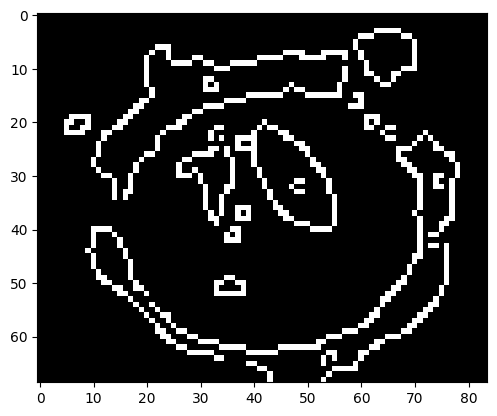

None


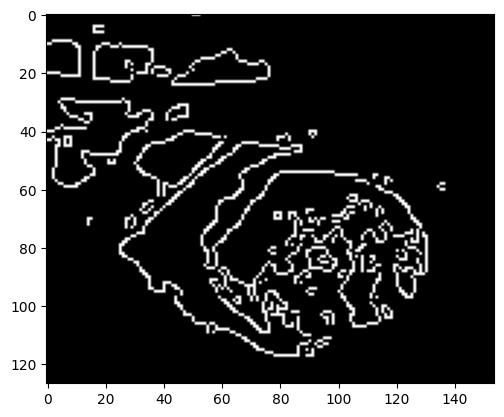

[[[75.75 81.75 42.55]]]


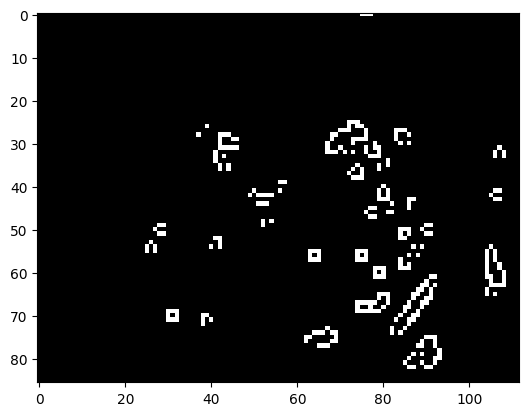

[[[62.25 45.75 37.6 ]]]


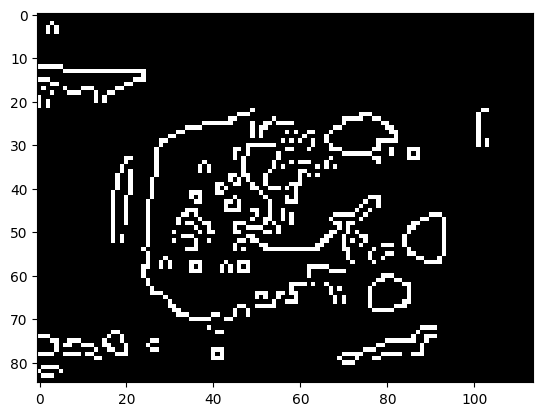

None
runs/detect/exp/crops/bolt_out/ningbo_000992.jpg


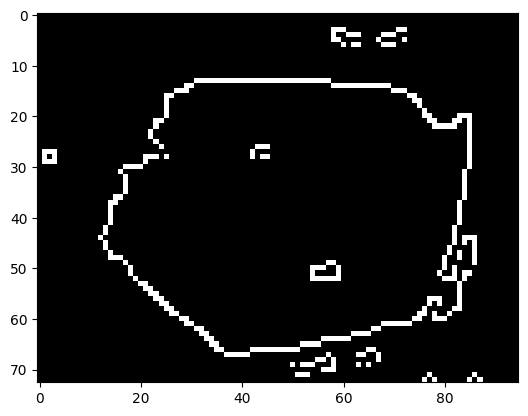

None
runs/detect/exp/crops/bolt_out/ningbo_00252.jpg


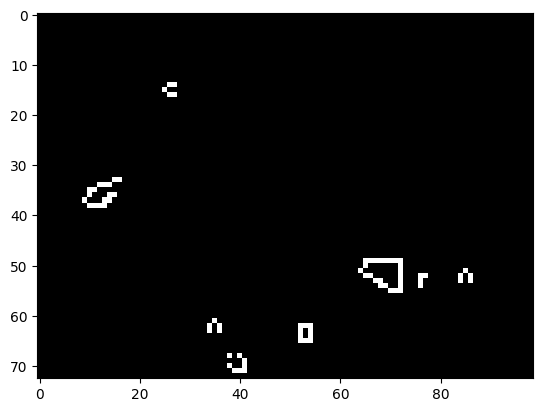

None
runs/detect/exp/crops/bolt_out/ningbo_000554.jpg


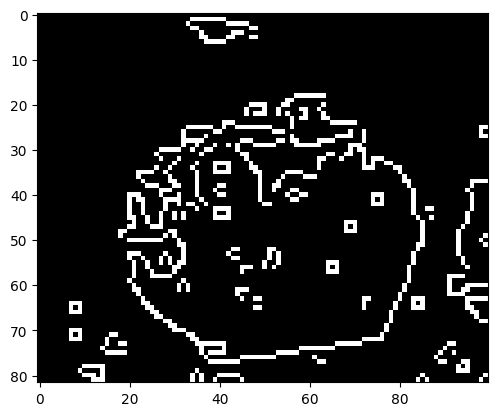

[[[50.25 44.25 34.3 ]]]


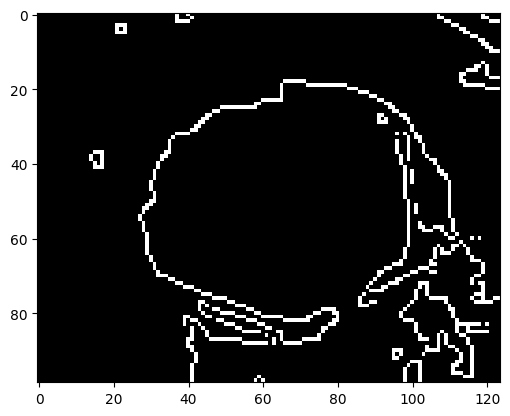

[[[60.75 50.25 44.2 ]]]


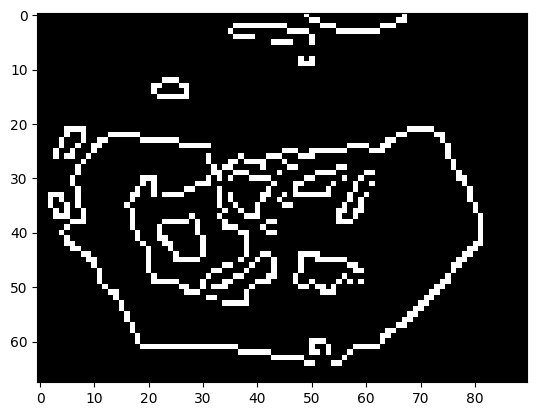

None
runs/detect/exp/crops/bolt_out/ningbo_000492.jpg


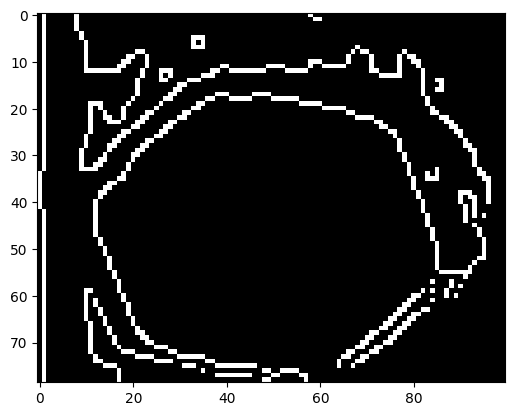

[[[47.25 42.75 35.95]]]


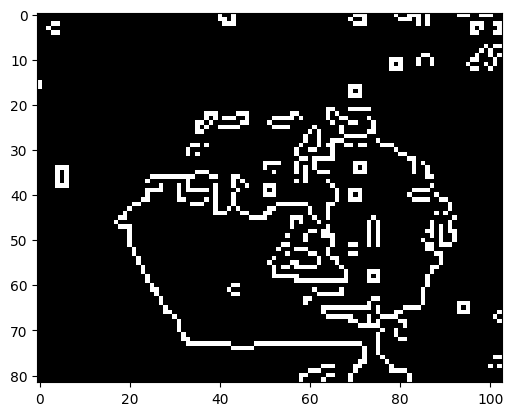

None
runs/detect/exp/crops/bolt_out/ningbo_003073.jpg


In [301]:
d = Path('./runs/detect/exp/crops/bolt_out/')

print(edge_detect(cv2.imread('./runs/detect/exp/crops/bolt_out/ningbo_00028.jpg')))

for f in islice(d.glob('ningbo_*'), 10):
    img = cv2.imread(str(f.resolve()))
    lines = edge_detect(img)
    print(lines)
    if lines is None:
        print(f)